In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import load_boston
from tensorflow import keras
import os

In [0]:
from matplotlib.animation import FuncAnimation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

**Loading Boston dataset**

In [0]:
boston=load_boston()

In [4]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Storing boston target values


In [5]:
target=pd.DataFrame(boston.target,columns=['target'])
target.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
max(target['target'])

50.0

# Joining boston data and target values

In [7]:
df=pd.concat([features,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Analysing all the data using describe() method
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Finding the most suitable variable to create linear regression model.



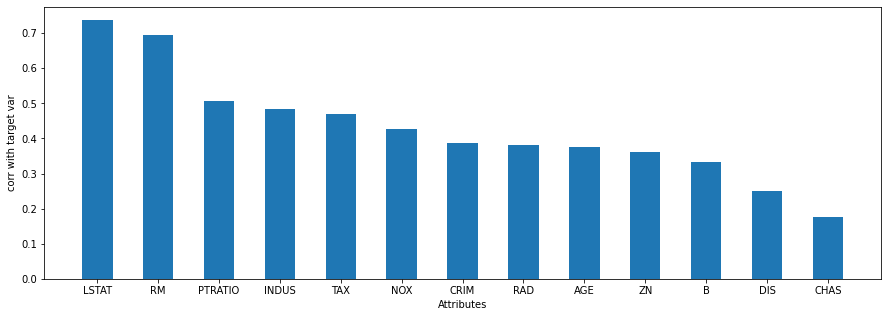

In [9]:
corr=df.corr('pearson')

corrs=[abs(corr[attr]['target']) for attr in list(features)]


l=list(zip(corrs,list(features)))
l.sort(key=lambda x:x[0],reverse=True)

corrs,labels=list(zip(*(l)))

index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel("corr with target var")
plt.xticks(index,labels)
plt.show()


# The variable with most correlation value is chosen.

In [10]:
X=df['LSTAT'].values
Y=df['target'].values
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

# Scaling the values so that relation between them could be found.

In [11]:
x_scalar=MinMaxScaler()
X=x_scalar.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scalar=MinMaxScaler()
Y=y_scalar.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

Y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

In [0]:
def error (m,x,c,t):
  N=len(x)
  e=sum(((m*x+c)-t)**2)
  return e*1/(2*N)

# Splitting the data into testing and training sets.

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [0]:
def update (m,x,c,t,learning_rate):
  grad_m=sum(2*((m*x+c)-t)*x)
  grad_c=sum(2*((m*x+c)-t))
  m=m-grad_m*learning_rate
  c=c-grad_c*learning_rate
  return m,c

In [0]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
  m=init_m
  c=init_c
  error_values=list()
  mc_values=list()
  for i in range(iterations):
    e=error(m,x,c,t)
    if e<error_threshold:
      print('error')
      break
    error_values.append(e)
    m,c=update(m,x,c,t,learning_rate)
    mc_values.append((m,c))
  return m,c,error_values,mc_values

calling gradient descent function.

In [36]:
%%time
print(len(xtrain))
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001

m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)



404
CPU times: user 68.6 ms, sys: 0 ns, total: 68.6 ms
Wall time: 68.6 ms


As there are 250 iterations which generates 250 values ,it is difficult to plot all the values so only 50 of them are chosen.

In [37]:
mc_values_anim=mc_values[0:250:5]
print(mc_values_anim)

[(0.8750521659614914, 0.09442809786607799), (0.650778754872888, 0.1761431517323147), (0.45473366433427337, 0.2377204943045984), (0.28579122282258956, 0.29078475605242615), (0.1402046184520445, 0.336513026648584), (0.014744969696384346, 0.3759194870987218), (-0.09337022080446751, 0.4098781106146251), (-0.1865387776509821, 0.43914204596740875), (-0.26682703265612706, 0.46436032114074877), (-0.33601565282967577, 0.4860922377490801), (-0.39563913276721885, 0.5048197754662808), (-0.44701982732284873, 0.5209582815755265), (-0.49129727935658385, 0.5348656827176927), (-0.5294534929997663, 0.5468504231403718), (-0.5623347129596441, 0.5571783055053601), (-0.5906701928938028, 0.5660783859729512), (-0.6150883691074231, 0.5737480543067159), (-0.6361307982804908, 0.5803574116674897), (-0.6542641683417891, 0.5860530431891428), (-0.6698906488719386, 0.5909612690059188), (-0.6833568105911165, 0.5951909458340073), (-0.694961311751642, 0.5988358812420159), (-0.7049615219075067, 0.6019769141550574), (-0.7

# Plotting the values along with the linear regression line.

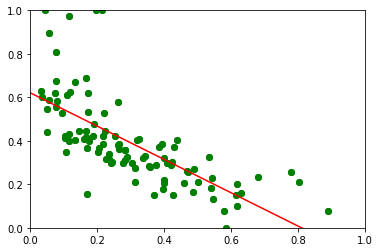

In [38]:
fig,ax=plt.subplots()
ln, =plt.plot([],[],'ro-',animated=True)

def init():
  plt.scatter(xtest,ytest,color='g')
  ax.set_xlim(0,1.0)
  ax.set_ylim(0,1.0)
  return ln,

def update_frame(frame):
  m,c=mc_values_anim[frame]
  x1,y1=-0.5,m*-.5+c
  x2,y2= 1.5 ,m*1.5+c
  ln.set_data([x1,x2],[y1,y2])
  return ln,

anim=FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),
                   init_func=init,blit=True)

HTML(anim.to_html5_video())

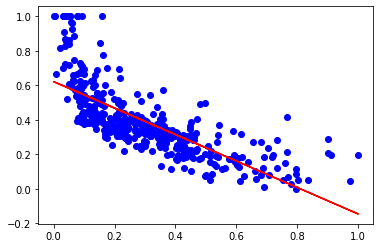

In [39]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')


# Plotting amount of error present after x  iterations.

Text(0, 0.5, 'iterations')

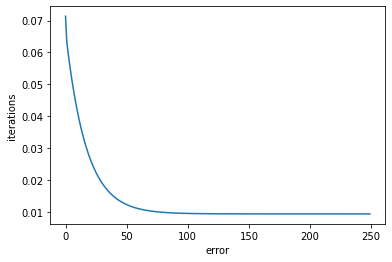

In [40]:

plt.plot(np.arange(len(error_values)),error_values)
plt.xlabel('error')
plt.ylabel('iterations')


# Predicting the cost using the obtained m,c values

In [0]:

predicted=(m*xtest)+c


# Finding the mean squared error between the predicted and actual values.
The less the values,more accurate is the prediction.

In [42]:
#mse
mean_squared_error(ytest,predicted)

0.020510513116834113

In [43]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted'])
p.head()

,x,target_y,predicted
0,[0.8910044150110377],[0.07555555555555556],[-0.061533967205704365]
1,[0.16583885209713026],[0.4155555555555555],[0.4941609204019607]
2,[0.05601545253863134],[0.8977777777777778],[0.5783186697428475]
3,[0.0750551876379691],[0.62],[0.5637285071686737]
4,[0.13383002207505518],[0.4022222222222223],[0.5186893096570936]


# Plotting the predicted linear regression line.

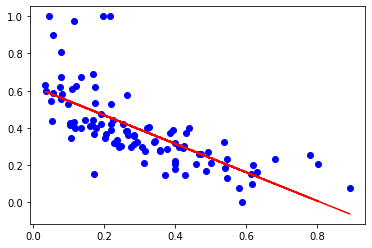

In [44]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

In [45]:

predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)
xtest_scaled=x_scalar.inverse_transform(xtest)
ytest_scaled=y_scalar.inverse_transform(ytest)
predicted_scaled=y_scalar.inverse_transform(predicted)

xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]


p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted
0,34.02,8.4,2.23
1,7.74,23.7,27.24
2,3.76,45.4,31.02
3,4.45,32.9,30.37
4,6.58,23.1,28.34
